In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

np.random.seed(42)

In [2]:
mnist = fetch_openml("mnist_784")
X, y = mnist["data"].to_numpy().reshape(-1, 28, 28).astype(float), mnist[
    "target"
].to_numpy().astype(int)
X[X <= 127] = 0.0
X[X > 127] = 1.0
n = X.shape[1] * X.shape[2]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(X_train.data.shape)
# Shape information
H, W = X_train.shape[1], X_train.shape[2]  # Height and Width

(63000, 28, 28)


In [23]:
print(H)

28


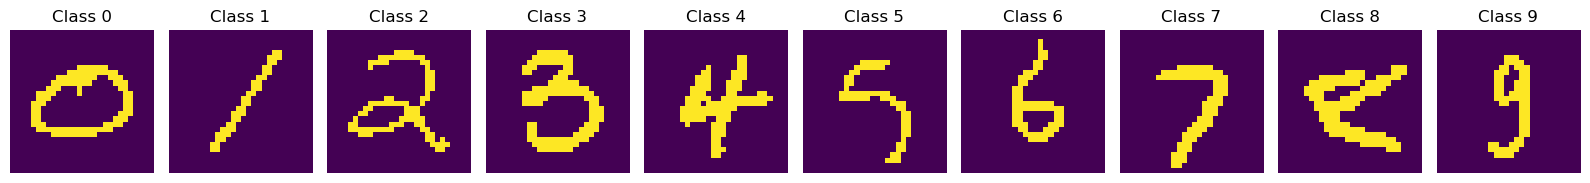

In [3]:
def plot_digits(X_train, y_train, num_classes=10):
    fig, axes = plt.subplots(1,num_classes, figsize=(16, 6))

    for cls in range(num_classes):
        # Select a random image from the class
        class_indices = np.where(y_train == cls)[0]
        random_index = np.random.choice(class_indices)
        random_image = X_train[random_index]

        # Plot the random image
        axes[cls].imshow(random_image)
        axes[cls].set_title(f"Class {cls}")
        axes[cls].axis("off")

    plt.tight_layout()

plot_digits(X_train, y_train)

In [ ]:
# Helper function for Laplace smoothing
def laplace_smoothing(count, total, alpha=1, coef=2):
    return (count + alpha) / (total + coef * alpha)


# Naive Bayes Classifier
class NaiveBayesClassifier:
    def __init__(self, num_classes=10):
        self.num_classes = num_classes
        self.P_y = None
        self.P_xy = None

    def train(self, X, y):
        print("Training NaiveBayes...")
        n_samples, H, W = X.shape[0], X.shape[1], X.shape[2]
        self.P_y = np.zeros(self.num_classes)
        self.P_xy = np.random.randn(self.num_classes, H, W)

        # TODO: Compute P(y) and P(x|y)

        # P(y)
        for n in range(n_samples):
            label = y[n] 
            self.P_y[label] += 1
        n_y = self.P_y.copy()
        self.P_y = (self.P_y / n_samples).astype(float)

        # P(x|y)
        for cls in range(self.num_classes):
            class_indices = np.where(y == cls)[0] #extract all samples of the current class
            X_class = X[class_indices]
            n_iy = np.sum(X_class, axis=0) # sum up all pixel values of one
            self.P_xy[cls] = laplace_smoothing(n_iy, n_y[cls])

    def predict(self, X):
        print("TEsting NaiveBayes...")
        n_samples = X.shape[0]
        predictions = np.random.randint(0,high=self.num_classes, size=X.shape[0])
        # TODO: Compute predictions
        for i in range(n_samples):
            class_pred = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                class_pred[j] = np.log(self.P_y[j])
                sum = X[i] * np.log(self.P_xy[j]) + (1 - X[i]) * np.log(1 - self.P_xy[j])
                class_pred[j] += np.sum(sum)
            predictions[i] = np.argmax(class_pred)


        return predictions

In [5]:
# Logistic Regression Classifier
class LogisticRegressionClassifier:
    def __init__(self, num_classes=10):
        self.num_classes = num_classes
        self.lr_model = None # TODO: Initialize your logistic regression model here

    def train(self, X, y):
        print("Training logistic regression...")
        # Todo: Train your logistic regression model here

    def predict(self, X):
        print("Predicting with logistic regression...")
        predictions = np.random.randint(0,high=self.num_classes, size=X.shape[0])
        # TODO: Compute predictions

        return predictions
    
    def get_weights(self):
        if self.lr_model is None:
            return None
        return self.lr_model.coef_ # This is For visualization purposes only

In [30]:
# Train and Evaluate Naive Bayes Classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Train and Evaluate Logistic Regression Classifier
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train.reshape(-1, n))
X_test_lr = scaler.transform(X_test.reshape(-1, n))
lr_classifier = LogisticRegressionClassifier()
lr_classifier.train(X_train_lr, y_train)
lr_preds = lr_classifier.predict(X_test_lr)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")


Training NaiveBayes...
TEsting NaiveBayes...
Naive Bayes Accuracy: 83.59%
Training logistic regression...
Predicting with logistic regression...
Logistic Regression Accuracy: 10.54%


TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...


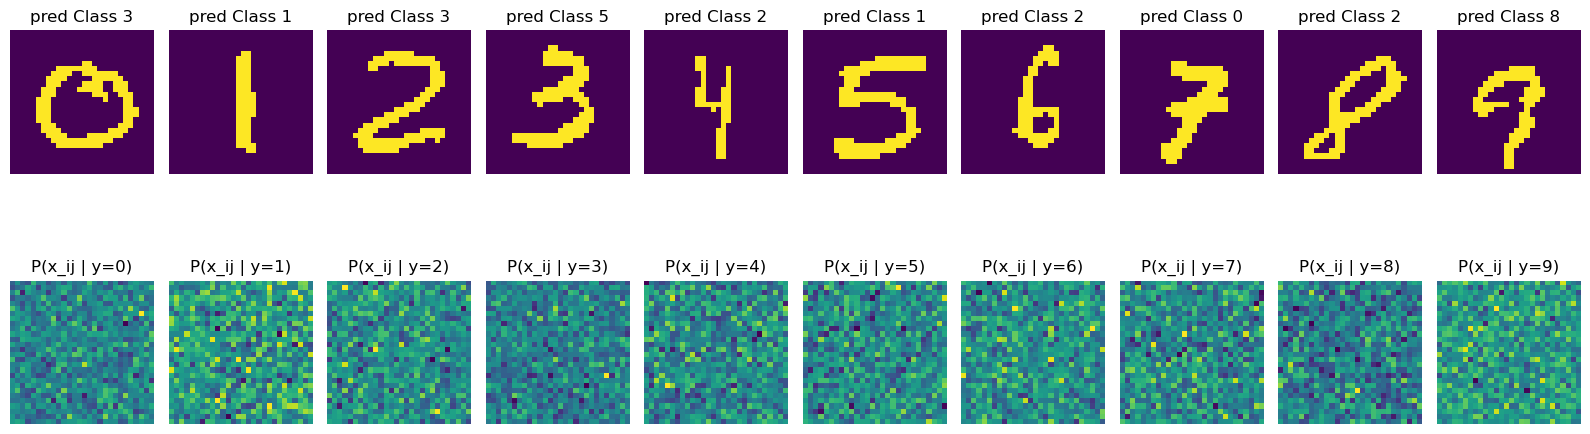

In [7]:
# Function to plot a random image and its corresponding P_xy for each class
def plot_random_image_and_p_xy(nb_classifier, X_test, y_test, num_classes=10):
    fig, axes = plt.subplots(2, num_classes, figsize=(16, 6))

    for cls in range(num_classes):
        # Select a random image from the class
        class_indices = np.where(y_test == cls)[0]
        random_index = np.random.choice(class_indices)
        random_image = X_test[random_index]
        prediction = nb_classifier.predict(random_image.reshape(1, H, W))[0]

        # Plot the random image
        axes[0, cls].imshow(random_image)
        axes[0, cls].set_title(f"pred Class {int(prediction)}")
        axes[0, cls].axis("off")

        # Plot the P_xy for the class
        axes[1, cls].imshow(nb_classifier.P_xy[cls])
        axes[1, cls].set_title(f"P(x_ij | y={cls})")
        axes[1, cls].axis("off")

    plt.tight_layout()

# Example usage
plot_random_image_and_p_xy(nb_classifier, X_train, y_train)

No weights found


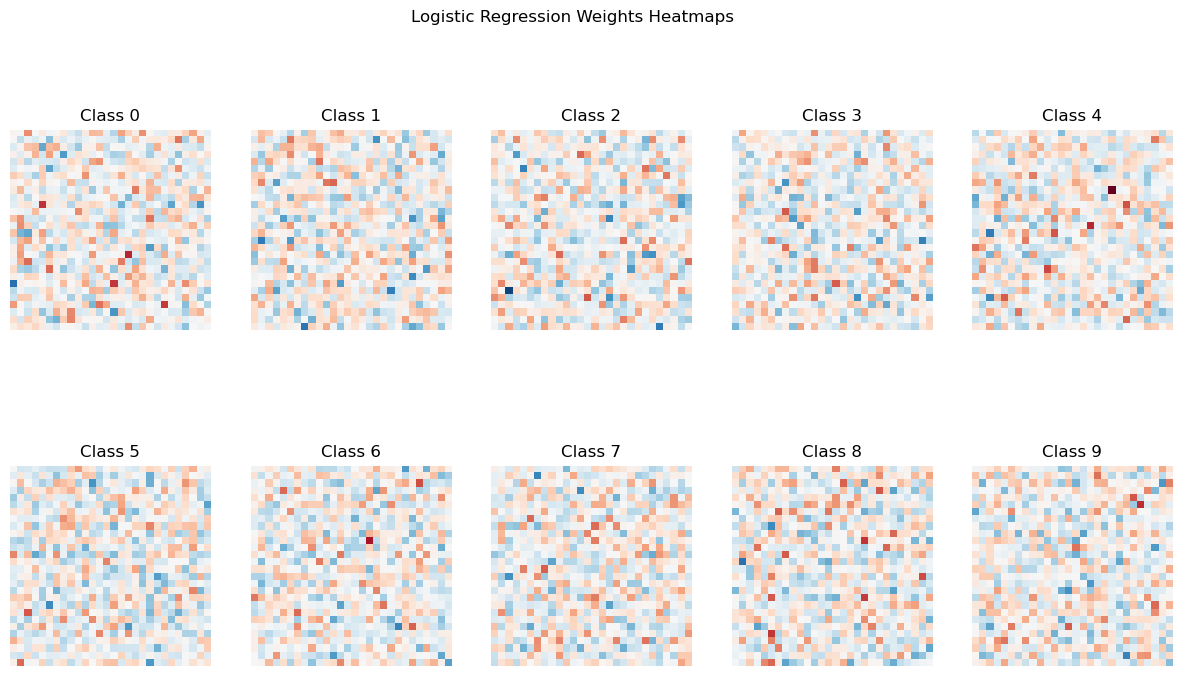

In [8]:
# Visualize weights for each class
coef = lr_classifier.get_weights()
if coef is None:
    print("No weights found")
    coef = np.random.randn(10, 28, 28)
weights = coef.reshape(10, 28, 28)
scale = np.abs(coef).max()

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(
        weights[i],
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    plt.title(f"Class {i}")
    plt.axis("off")
plt.suptitle("Logistic Regression Weights Heatmaps")
plt.show()